# CAPSTONE - Electricity
    

In [1]:

#let's import below packages:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from datetime import datetime

In [2]:
# First let's find current Directory:
os.getcwd()

'/Users/markoglodovic'

In [3]:
# Changing the directory:
os.chdir(r'/Users/markoglodovic/Documents/Springboard_projects/Electricity')

In [4]:
os.getcwd()

'/Users/markoglodovic/Documents/Springboard_projects/Electricity'

## The Data wrangling step focuses on collecting our data, organizing it, and making sure it's well defined. For our project we have collected below dataset to have a good foundation to build a Machine Learning model where we can provide a good estimate of future tendecies regarding electricity needs in USA and CANADA.

In [5]:
df = pd.read_csv('/Users/markoglodovic/Downloads/electricity-exports-and-imports-monthly.csv',    encoding='latin-1')

We will need to Clean NANs, duplicate values, wrong values and removing insignificant columns.


In [6]:
# lets check the Dataframe we got
df.head()

,Period,Activity,Source,Destination,Energy (MW.h),Total Value (CAN$),Price (CAN$/MW.h)
0,01/01/1990,Exports,British Columbia,Alaska,75.196,4536.00,60.32
1,01/01/1990,Exports,British Columbia,California,345904.000,11144596.03,32.22
2,01/01/1990,Exports,British Columbia,Oregon,148800.000,4770498.00,32.06
3,01/01/1990,Exports,British Columbia,Total,496761.596,16000590.03,32.21
4,01/01/1990,Exports,British Columbia,Washington,1982.400,80960.00,40.84


In [7]:
# let's check the data types in the df:
df.dtypes

Period                 object
Activity               object
Source                 object
Destination            object
Energy (MW.h)         float64
Total Value (CAN$)    float64
Price (CAN$/MW.h)      object
dtype: object

#### So the data types need to be changed 

In [8]:
# let's change 'Perid' data type from 'object' to 'datetime':
df['Period']=pd.to_datetime(df['Period'])

In [9]:
# second we need to change 'Price' data type from 'object' to 'float64'
df['Price (CAN$/MW.h)'] = df['Price (CAN$/MW.h)'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [10]:
# let's check the data types in the df:
df.dtypes

Period                datetime64[ns]
Activity                      object
Source                        object
Destination                   object
Energy (MW.h)                float64
Total Value (CAN$)           float64
Price (CAN$/MW.h)            float64
dtype: object

### Data types are corrected

In [11]:
# let's check if we have any NANs: 
df.isnull().sum()

Period                  0
Activity                0
Source                  0
Destination             6
Energy (MW.h)           0
Total Value (CAN$)      0
Price (CAN$/MW.h)     573
dtype: int64

In [12]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
Price (CAN$/MW.h),573,1.564676
Destination,6,0.016384
Period,0,0.000000
Activity,0,0.000000
Source,0,0.000000
Energy (MW.h),0,0.000000
Total Value (CAN$),0,0.000000


In [13]:
# lets change the name of columns for easier work
df=df.rename(columns = {'Price (CAN$/MW.h)':'Price','Total Value (CAN$)':'Total_Value','Energy (MW.h)':'Energy' })

In [14]:
# checking for nan values in 'Destination'
df[df['Destination'].isnull()]

,Period,Activity,Source,Destination,Energy,Total_Value,Price
5748,1997-07-01,Exports,British Columbia,NaN,17280.0,554991.26,32.119999
5784,1997-07-01,Exports,Total,NaN,17280.0,554991.26,32.119999
5839,1997-08-01,Exports,British Columbia,NaN,20800.0,671478.60,32.279999
5878,1997-08-01,Exports,Total,NaN,20800.0,671478.60,32.279999
5936,1997-09-01,Exports,British Columbia,NaN,15350.0,501942.40,32.700001
5973,1997-09-01,Exports,Total,NaN,15350.0,501942.40,32.700001


In [15]:
# we can't find out the destination so we should drop the rows
df = df.dropna(subset=['Destination'])

In [16]:
df.isnull().sum()

Period           0
Activity         0
Source           0
Destination      0
Energy           0
Total_Value      0
Price          573
dtype: int64

In [17]:
# now lets check for 'Price' column
df[df['Price'].isnull()]

,Period,Activity,Source,Destination,Energy,Total_Value,Price
14093,2005-05-01,Exports,Manitoba,Minn / N. Dakota,1180302.087,48985493.92,NaN
14094,2005-05-01,Exports,Manitoba,Total,1180302.087,48985493.92,NaN
14124,2005-05-01,Exports,Total,Minn / N. Dakota,1180302.087,48985493.92,NaN
14211,2005-06-01,Exports,Manitoba,Minn / N. Dakota,1180010.579,56770667.49,NaN
14212,2005-06-01,Exports,Manitoba,Total,1180010.579,56770667.49,NaN
...,...,...,...,...,...,...,...
36412,2021-02-01,Exports,Manitoba,Total,302822.557,41185178.51,NaN
36450,2021-02-01,Exports,Total,Minn / N. Dakota,305755.557,41302521.51,NaN
36530,2021-03-01,Exports,Manitoba,Minn / N. Dakota,571305.225,37367970.89,NaN
36532,2021-03-01,Exports,Manitoba,Total,571305.225,37367970.89,NaN


In [18]:
# we can find the missing price if we divide total_value with energy
df['price'] = df['Total_Value'] / df['Energy']

In [19]:
# fill up the missing values
df = df.fillna({'Price': df['price']})

In [20]:
df.isnull().sum()

Period           0
Activity         0
Source           0
Destination      0
Energy           0
Total_Value      0
Price            0
price          754
dtype: int64

In [21]:
#drop the 'price' column we dont need it anymore
df.drop('price', axis=1, inplace=True)

In [22]:
df.isnull().sum()

Period         0
Activity       0
Source         0
Destination    0
Energy         0
Total_Value    0
Price          0
dtype: int64

In [23]:
df.head()

,Period,Activity,Source,Destination,Energy,Total_Value,Price
0,1990-01-01,Exports,British Columbia,Alaska,75.196,4536.00,60.320000
1,1990-01-01,Exports,British Columbia,California,345904.000,11144596.03,32.220001
2,1990-01-01,Exports,British Columbia,Oregon,148800.000,4770498.00,32.060001
3,1990-01-01,Exports,British Columbia,Total,496761.596,16000590.03,32.209999
4,1990-01-01,Exports,British Columbia,Washington,1982.400,80960.00,40.840000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36615 entries, 0 to 36620
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Period       36615 non-null  datetime64[ns]
 1   Activity     36615 non-null  object        
 2   Source       36615 non-null  object        
 3   Destination  36615 non-null  object        
 4   Energy       36615 non-null  float64       
 5   Total_Value  36615 non-null  float64       
 6   Price        36615 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 2.2+ MB


In [25]:
#check for duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
36616    False
36617    False
36618    False
36619    False
36620    False
Length: 36615, dtype: bool

In [26]:
df['Source'].unique()

array(['British Columbia', 'Manitoba', 'New Brunswick', 'Ontario',
       'Québec', 'Total', 'Maine', 'Michigan', 'Minnesota', 'Montana',
       'New England-ISO', 'New York', 'North Dakota', 'Vermont',
       'Washington', 'Saskatchewan', 'Pennsylvania', 'Alberta', 'Idaho',
       'Nebraska', 'South Dakota', 'Texas', 'Oregon', 'Wisconsin', 'Iowa',
       'Missouri', 'Kansas', 'California', 'Minn / N. Dakota',
       'Massachusetts', 'Nova Scotia', 'Illinois', 'Ohio', 'Indiana',
       'New Jersey', 'Arizona', 'Nevada', 'New Mexico', 'Wyoming',
       'Oklahoma', 'Colorado', 'Kentucky', 'Utah', 'Connecticut',
       'Pennsylvania Jersey Maryland Power Pool',
       'Newfoundland and Labrador', 'West Virginia'], dtype=object)

In [27]:
df['Destination'].unique()

array(['Alaska', 'California', 'Oregon', 'Total', 'Washington',
       'Minnesota', 'North Dakota', 'Maine', 'Massachusetts', 'Michigan',
       'New York', 'Vermont', 'New Brunswick', 'Ontario', 'Manitoba',
       'British Columbia', 'Québec', 'Saskatchewan', 'Alberta', 'Idaho',
       'Nevada', 'Montana', 'New Hampshire', 'New England-ISO',
       'Pennsylvania', 'Arizona', 'Missouri', 'Wisconsin', 'South Dakota',
       'Texas', 'Nebraska', 'Iowa', 'Colorado', 'Kansas', 'Utah',
       'Minn / N. Dakota', 'New Mexico', 'Maryland', 'Nova Scotia',
       'Virginia', 'Wyoming', 'Ohio', 'Tennessee', 'Illinois', 'Indiana',
       'Connecticut', 'Pennsylvania Jersey Maryland Power Pool',
       'Mississippi', 'New Jersey', 'Newfoundland and Labrador',
       'Oklahoma', 'Florida'], dtype=object)

In [28]:
# we have total value that we dont need, so we will drop it
df = df[df['Source'].str.contains('Total')==False]

In [29]:
# we have total value that we dont need, so we will drop it
df = df[df['Destination'].str.contains('Total')==False]

In [30]:
# we also have place that covers 3 different states, 
# and we are not sure divide values between them so we will drop it
df = df[df['Source'].str.contains('Pennsylvania Jersey Maryland Power Pool')==False]


In [31]:
df = df[df['Destination'].str.contains('Pennsylvania Jersey Maryland Power Pool')==False]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17355 entries, 0 to 36619
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Period       17355 non-null  datetime64[ns]
 1   Activity     17355 non-null  object        
 2   Source       17355 non-null  object        
 3   Destination  17355 non-null  object        
 4   Energy       17355 non-null  float64       
 5   Total_Value  17355 non-null  float64       
 6   Price        17355 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 1.1+ MB


In [33]:
df.head()

,Period,Activity,Source,Destination,Energy,Total_Value,Price
0,1990-01-01,Exports,British Columbia,Alaska,75.196,4536.00,60.320000
1,1990-01-01,Exports,British Columbia,California,345904.000,11144596.03,32.220001
2,1990-01-01,Exports,British Columbia,Oregon,148800.000,4770498.00,32.060001
4,1990-01-01,Exports,British Columbia,Washington,1982.400,80960.00,40.840000
5,1990-01-01,Exports,Manitoba,Minnesota,5100.424,129051.37,25.299999


#### LETS CHECK FOR OUTLIERS

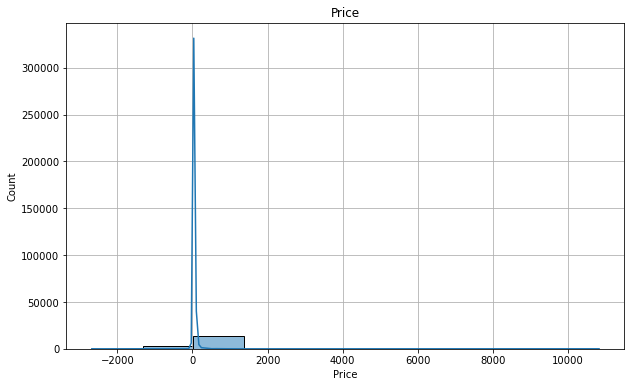

In [34]:
f, ax = plt.subplots(figsize = (10,6))
ax = sns.histplot(df['Price'], kde=True, bins=10)
ax.set_title('Price')
plt.grid(True)

In [35]:
df.Price.sort_values(ascending=False)

11305    10832.799805
13093     3127.989990
1174      3057.239990
28134     1624.369995
9039      1331.369995
             ...     
10239     -223.089996
29471     -462.320007
3614      -734.179993
10271    -2220.290039
10419    -2680.199951
Name: Price, Length: 17355, dtype: float64

In [36]:
df[df['Price'] > 10000 ]

,Period,Activity,Source,Destination,Energy,Total_Value,Price
11305,2002-12-01,Imports,Maine,Québec,1463.0,15848382.71,10832.799805


In [37]:
# This price looks like an outlier so we shoud drop it 
df = df.drop(labels=11305, axis=0)

In [38]:
df[df['Price'] > 10000 ]

,Period,Activity,Source,Destination,Energy,Total_Value,Price


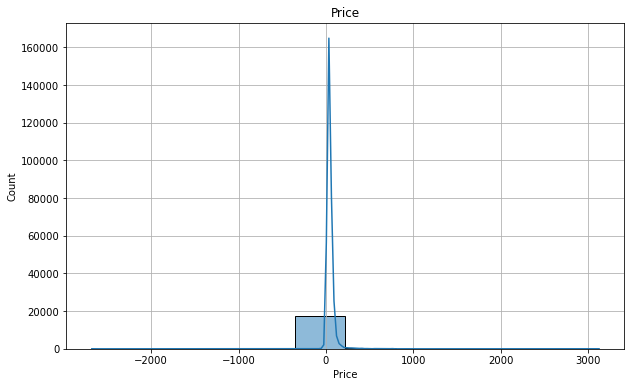

In [39]:
f, ax = plt.subplots(figsize = (10,6))
ax = sns.histplot(df['Price'], kde=True, bins=10)
ax.set_title('Price')
plt.grid(True)

In [40]:
df[df['Price'] < 0]

,Period,Activity,Source,Destination,Energy,Total_Value,Price
3614,1994-11-01,Exports,New Brunswick,Massachusetts,50.0,-3.670900e+04,-734.179993
6440,1998-02-01,Imports,New England-ISO,Québec,401.0,-2.632080e+04,-65.639999
10164,2001-09-01,Exports,Québec,New York,-27885.0,1.018237e+07,-95.120003
10239,2001-10-01,Exports,Québec,New York,89861.0,-1.245261e+07,-223.089996
10271,2001-10-01,Imports,New York,Ontario,34.0,-7.548974e+04,-2220.290039
...,...,...,...,...,...,...,...
36142,2020-11-01,Imports,Nebraska,British Columbia,6135.0,-6.290563e+04,-10.250000
36251,2020-12-01,Imports,Nebraska,British Columbia,1015.0,-5.015736e+03,-4.940000
36490,2021-02-01,Imports,Nebraska,British Columbia,2108.0,-3.515524e+04,-16.680000
36598,2021-03-01,Imports,Nebraska,British Columbia,11005.0,-1.704268e+04,-1.550000


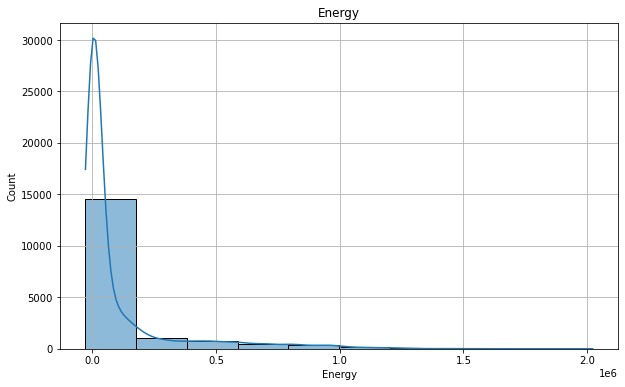

In [41]:
f, ax = plt.subplots(figsize = (10,6))
ax = sns.histplot(df['Energy'], kde=True, bins=10)
ax.set_title('Energy')
plt.grid(True)

In [42]:
df.Energy.sort_values(ascending=False)

18850    2022303.0
10889    1717663.0
10962    1538251.0
10607    1440156.0
9528     1400401.0
           ...    
29316          0.0
31565          0.0
5257          -9.0
10163        -83.0
10164     -27885.0
Name: Energy, Length: 17354, dtype: float64

In [43]:
# we are not sure how energy can be negative value so we will drop the rows with negative values
df = df.drop(labels=[5257,10163,10164], axis=0)

In [44]:
df.Energy.sort_values(ascending=False)

18850    2022303.0
10889    1717663.0
10962    1538251.0
10607    1440156.0
9528     1400401.0
           ...    
35754          0.0
27926          0.0
27919          0.0
35797          0.0
27648          0.0
Name: Energy, Length: 17351, dtype: float64

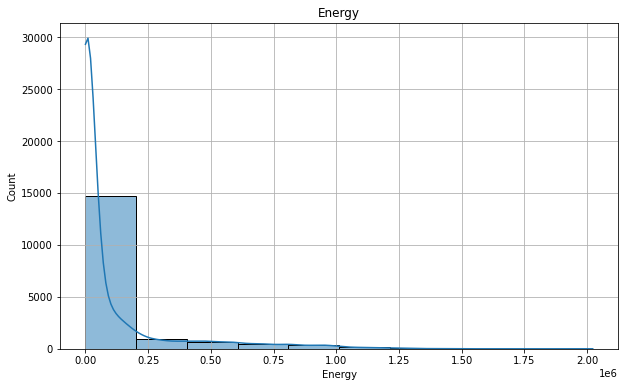

In [45]:
f, ax = plt.subplots(figsize = (10,6))
ax = sns.histplot(df['Energy'], kde=True, bins=10)
ax.set_title('Energy')
plt.grid(True)

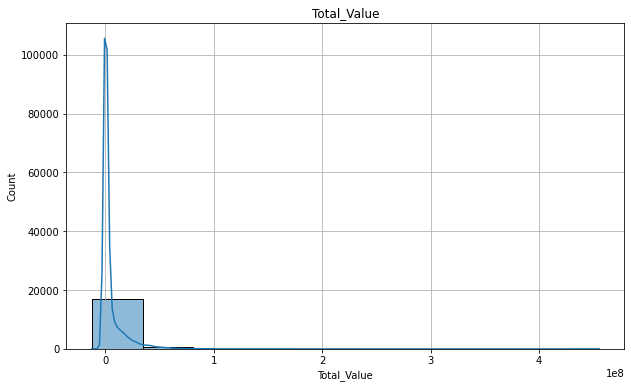

In [46]:
f, ax = plt.subplots(figsize = (10,6))
ax = sns.histplot(df['Total_Value'], kde=True, bins=10)
ax.set_title('Total_Value')
plt.grid(True)

In [47]:
df.Total_Value.sort_values(ascending=False)

9848     4.554837e+08
9629     3.506929e+08
9777     3.298275e+08
9769     2.890566e+08
9696     2.856347e+08
             ...     
26119   -1.815686e+06
10419   -1.889542e+06
4144    -4.246341e+06
10310   -4.397565e+06
10239   -1.245261e+07
Name: Total_Value, Length: 17351, dtype: float64

#### Finding locations

In [48]:
a = list(df['Source'].unique())

In [49]:
print(a)

['British Columbia', 'Manitoba', 'New Brunswick', 'Ontario', 'Québec', 'Maine', 'Michigan', 'Minnesota', 'Montana', 'New England-ISO', 'New York', 'North Dakota', 'Vermont', 'Washington', 'Saskatchewan', 'Pennsylvania', 'Alberta', 'Idaho', 'Nebraska', 'South Dakota', 'Texas', 'Oregon', 'Wisconsin', 'Iowa', 'Missouri', 'Kansas', 'California', 'Minn / N. Dakota', 'Massachusetts', 'Nova Scotia', 'Illinois', 'Ohio', 'Indiana', 'New Jersey', 'Arizona', 'Nevada', 'New Mexico', 'Wyoming', 'Oklahoma', 'Colorado', 'Kentucky', 'Utah', 'Connecticut', 'Newfoundland and Labrador', 'West Virginia']


In [50]:
from geopy.geocoders import Nominatim
latitude = []
longitude = []
places= []
for x in a:
    address= x
    geolocator = Nominatim(user_agent="Your_Name")
    location = geolocator.geocode(address)
    latitude.append(location.latitude)
    longitude.append(location.longitude)
    places.append(x)
    

In [51]:
res = dict(zip(places,latitude))
res_1 = dict(zip(places,longitude))

In [52]:
df['S_latitude'] = df['Source'].map(res)
df['S_longitude'] = df['Source'].map(res_1)

In [53]:
df.head()

,Period,Activity,Source,Destination,Energy,Total_Value,Price,S_latitude,S_longitude
0,1990-01-01,Exports,British Columbia,Alaska,75.196,4536.00,60.320000,55.001251,-125.002441
1,1990-01-01,Exports,British Columbia,California,345904.000,11144596.03,32.220001,55.001251,-125.002441
2,1990-01-01,Exports,British Columbia,Oregon,148800.000,4770498.00,32.060001,55.001251,-125.002441
4,1990-01-01,Exports,British Columbia,Washington,1982.400,80960.00,40.840000,55.001251,-125.002441
5,1990-01-01,Exports,Manitoba,Minnesota,5100.424,129051.37,25.299999,55.001251,-97.001038


In [54]:
b = list(df['Destination'].unique())

In [55]:
from geopy.geocoders import Nominatim
d_latitude = []
d_longitude = []
d_places= []
for x in b:
    address= x
    geolocator = Nominatim(user_agent="Your_Name")
    location = geolocator.geocode(address)
    d_latitude.append(location.latitude)
    d_longitude.append(location.longitude)
    d_places.append(x)

In [56]:
d_res = dict(zip(d_places,d_latitude))
d_res_1 = dict(zip(d_places,d_longitude))

In [57]:
df['D_latitude'] = df['Destination'].map(d_res)
df['D_longitude'] = df['Destination'].map(d_res_1)

In [58]:
df.head()

,Period,Activity,Source,Destination,Energy,Total_Value,Price,S_latitude,S_longitude,D_latitude,D_longitude
0,1990-01-01,Exports,British Columbia,Alaska,75.196,4536.00,60.320000,55.001251,-125.002441,64.445961,-149.680909
1,1990-01-01,Exports,British Columbia,California,345904.000,11144596.03,32.220001,55.001251,-125.002441,36.701463,-118.755997
2,1990-01-01,Exports,British Columbia,Oregon,148800.000,4770498.00,32.060001,55.001251,-125.002441,43.979280,-120.737257
4,1990-01-01,Exports,British Columbia,Washington,1982.400,80960.00,40.840000,55.001251,-125.002441,38.894992,-77.036558
5,1990-01-01,Exports,Manitoba,Minnesota,5100.424,129051.37,25.299999,55.001251,-97.001038,45.989659,-94.611329


In [59]:
# lets reset index
df.reset_index(drop=True)


,Period,Activity,Source,Destination,Energy,Total_Value,Price,S_latitude,S_longitude,D_latitude,D_longitude
0,1990-01-01,Exports,British Columbia,Alaska,75.1960,4.536000e+03,60.320000,55.001251,-125.002441,64.445961,-149.680909
1,1990-01-01,Exports,British Columbia,California,345904.0000,1.114460e+07,32.220001,55.001251,-125.002441,36.701463,-118.755997
2,1990-01-01,Exports,British Columbia,Oregon,148800.0000,4.770498e+06,32.060001,55.001251,-125.002441,43.979280,-120.737257
3,1990-01-01,Exports,British Columbia,Washington,1982.4000,8.096000e+04,40.840000,55.001251,-125.002441,38.894992,-77.036558
4,1990-01-01,Exports,Manitoba,Minnesota,5100.4240,1.290514e+05,25.299999,55.001251,-97.001038,45.989659,-94.611329
...,...,...,...,...,...,...,...,...,...,...,...
17346,2021-03-01,Imports,New York,Québec,1924.0000,1.031400e+05,53.610001,40.712728,-74.006015,52.476089,-71.825867
17347,2021-03-01,Imports,North Dakota,Saskatchewan,3604.0000,-1.776333e+04,-4.930000,47.620146,-100.540737,55.532126,-106.141224
17348,2021-03-01,Imports,Oregon,British Columbia,11509.9998,2.193562e+05,19.059999,43.979280,-120.737257,55.001251,-125.002441
17349,2021-03-01,Imports,Washington,Alberta,36203.0000,1.277322e+06,35.279999,38.894992,-77.036558,55.001251,-115.002136


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17351 entries, 0 to 36619
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Period       17351 non-null  datetime64[ns]
 1   Activity     17351 non-null  object        
 2   Source       17351 non-null  object        
 3   Destination  17351 non-null  object        
 4   Energy       17351 non-null  float64       
 5   Total_Value  17351 non-null  float64       
 6   Price        17351 non-null  float64       
 7   S_latitude   17351 non-null  float64       
 8   S_longitude  17351 non-null  float64       
 9   D_latitude   17351 non-null  float64       
 10  D_longitude  17351 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 1.6+ MB


### Lets do more visualizations

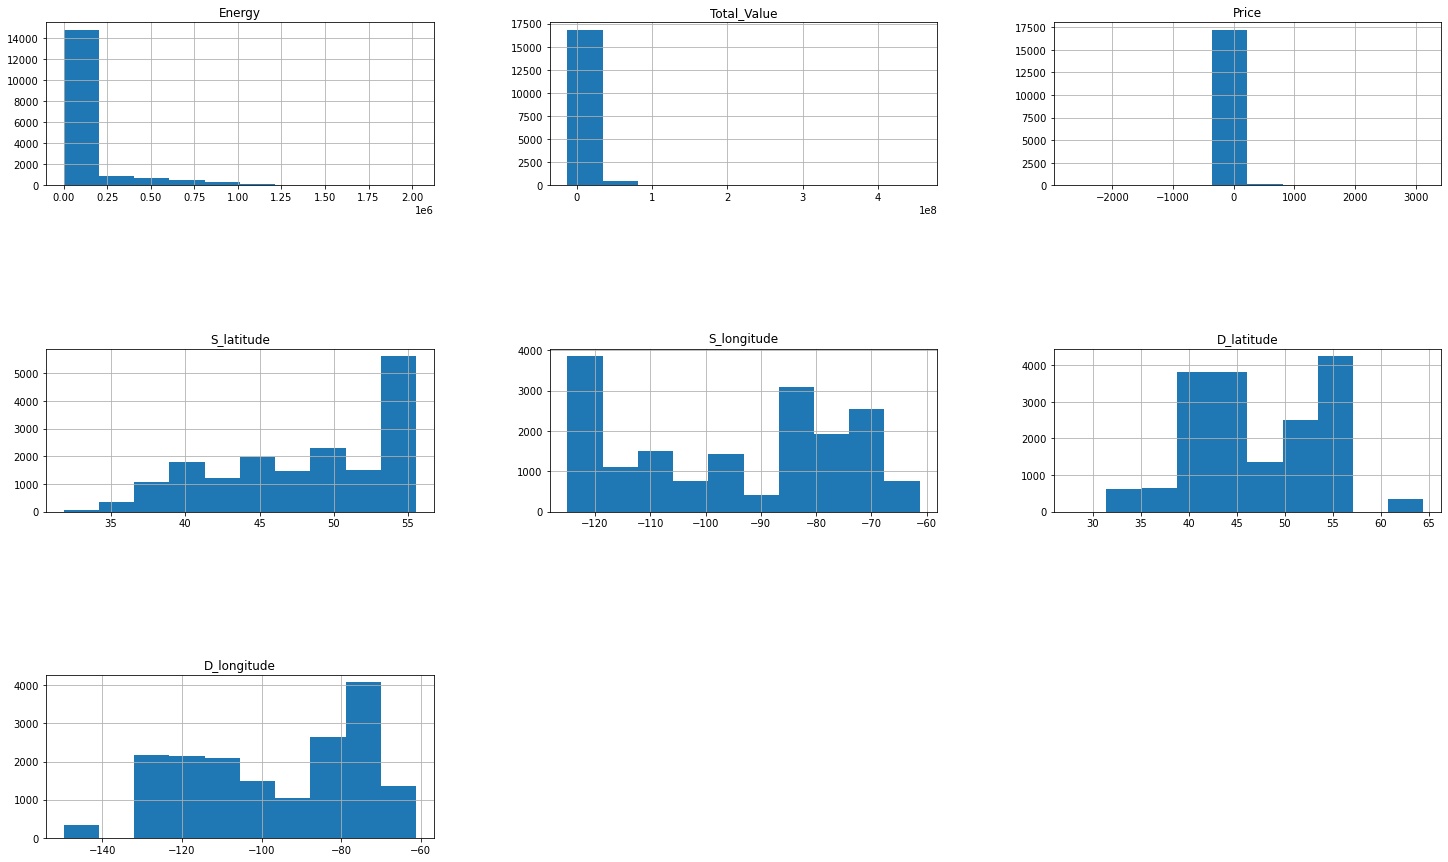

In [61]:
df.hist(figsize=(25, 15))
plt.subplots_adjust(hspace=1)

In [62]:
# Total value of electricity by years
df[['Period', 'Total_Value']].groupby(df['Period'].dt.year).sum()

,Total_Value
Period,
1990,1.135287e+09
1991,6.342699e+08
1992,7.751095e+08
1993,9.425052e+08
1994,1.372487e+09
1995,1.262512e+09
1996,1.326286e+09
1997,1.588744e+09
1998,1.919046e+09


<AxesSubplot:xlabel='Period'>

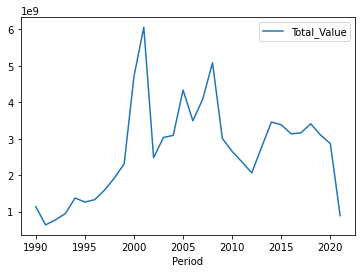

In [63]:
df[['Period', 'Total_Value']].groupby(df['Period'].dt.year).sum().plot()

In [64]:
# lets see separate values for import and export by year
df[['Period', 'Total_Value', 'Activity']].groupby([df['Period'].dt.year,'Activity']).sum()

Total_Value
Period Activity              
1990   Exports   5.793857e+08
       Imports   5.559010e+08
1991   Exports   5.591236e+08
       Imports   7.514624e+07
1992   Exports   6.979086e+08
...                       ...
2019   Imports   5.912061e+08
2020   Exports   2.573527e+09
       Imports   2.932068e+08
2021   Exports   7.452697e+08
       Imports   1.427417e+08

[64 rows x 1 columns]

In [65]:
di = df[df['Activity']=='Imports']
de = df[df['Activity']=='Exports']

In [66]:
di[['Period', 'Total_Value', 'Activity']].groupby(df['Period'].dt.year).sum()


,Total_Value
Period,
1990,5.559010e+08
1991,7.514624e+07
1992,7.720083e+07
1993,8.477848e+07
1994,4.386362e+07
1995,7.776412e+07
1996,1.081168e+08
1997,2.124576e+08
1998,3.131926e+08


In [67]:
de[['Period', 'Total_Value', 'Activity']].groupby(df['Period'].dt.year).sum()

,Total_Value
Period,
1990,5.793857e+08
1991,5.591236e+08
1992,6.979086e+08
1993,8.577268e+08
1994,1.328623e+09
1995,1.184748e+09
1996,1.218169e+09
1997,1.376286e+09
1998,1.605853e+09


<AxesSubplot:xlabel='Period', ylabel='Export'>

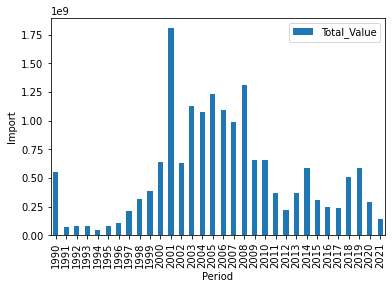

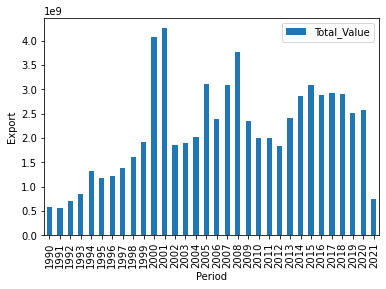

In [68]:
di[['Period', 'Total_Value', 'Activity']].groupby(df['Period'].dt.year).sum().plot(kind='bar',ylabel='Import')
de[['Period', 'Total_Value', 'Activity']].groupby(df['Period'].dt.year).sum().plot(kind='bar', ylabel='Export')




<AxesSubplot:xlabel='Period', ylabel='Export'>

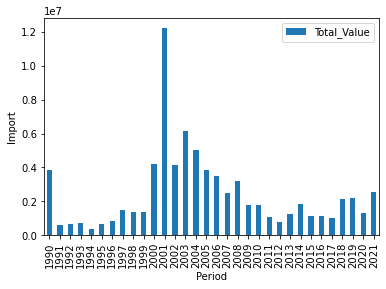

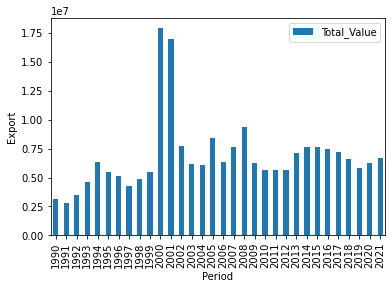

In [69]:
#average value by year
di[['Period', 'Total_Value', 'Activity']].groupby(df['Period'].dt.year).mean().plot(kind='bar',ylabel='Import')
de[['Period', 'Total_Value', 'Activity']].groupby(df['Period'].dt.year).mean().plot(kind='bar', ylabel='Export')



<AxesSubplot:xlabel='Period', ylabel='Export'>

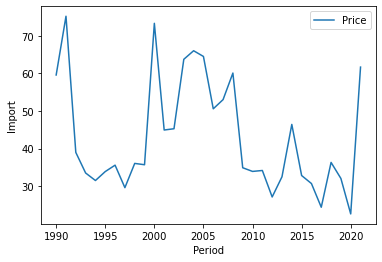

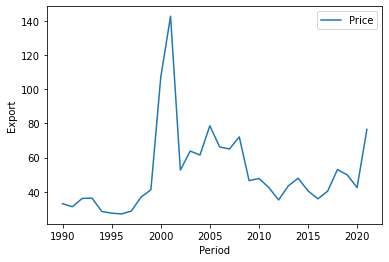

In [70]:
#average price by yeAR
di[['Period', 'Price', 'Activity']].groupby(df['Period'].dt.year).mean().plot(kind='line',ylabel='Import')
de[['Period', 'Price', 'Activity']].groupby(df['Period'].dt.year).mean().plot(kind='line', ylabel='Export')

In [71]:
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [72]:
import os
from bokeh.models import GMapOptions
from bokeh.plotting import gmap

In [73]:
from bokeh.plotting import figure
from bokeh.models import WMTSTileSource

# web mercator coordinates
USA = x_range,y_range = ((-13884029,-7453304), (2698291,6455972))

p = figure(tools='pan, wheel_zoom', x_range=x_range, y_range=y_range, 
           x_axis_type="mercator", y_axis_type="mercator")

In [74]:
url = 'http://a.basemaps.cartocdn.com/rastertiles/voyager/{Z}/{X}/{Y}.png'
attribution = "Tiles by Carto, under CC BY 3.0. Data by OSM, under ODbL"

p.add_tile(WMTSTileSource(url=url, attribution=attribution))

TileRenderer(id='1033', ...)

In [75]:
def wgs84_to_web_mercator(df, lon="S_longitude", lat="S_latitude"):
    """Converts decimal longitude/latitude to Web Mercator format"""
    k = 6378137
    df["x"] = df['S_longitude'] * (k * np.pi/180.0)
    df["y"] = np.log(np.tan((90 + df['S_latitude']) * np.pi/360.0)) * k
    return df

In [76]:
wgs84_to_web_mercator(df)

,Period,Activity,Source,Destination,Energy,Total_Value,Price,S_latitude,S_longitude,D_latitude,D_longitude,x,y
0,1990-01-01,Exports,British Columbia,Alaska,75.1960,4.536000e+03,60.320000,55.001251,-125.002441,64.445961,-149.680909,-1.391521e+07,7.362109e+06
1,1990-01-01,Exports,British Columbia,California,345904.0000,1.114460e+07,32.220001,55.001251,-125.002441,36.701463,-118.755997,-1.391521e+07,7.362109e+06
2,1990-01-01,Exports,British Columbia,Oregon,148800.0000,4.770498e+06,32.060001,55.001251,-125.002441,43.979280,-120.737257,-1.391521e+07,7.362109e+06
4,1990-01-01,Exports,British Columbia,Washington,1982.4000,8.096000e+04,40.840000,55.001251,-125.002441,38.894992,-77.036558,-1.391521e+07,7.362109e+06
5,1990-01-01,Exports,Manitoba,Minnesota,5100.4240,1.290514e+05,25.299999,55.001251,-97.001038,45.989659,-94.611329,-1.079811e+07,7.362109e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36601,2021-03-01,Imports,New York,Québec,1924.0000,1.031400e+05,53.610001,40.712728,-74.006015,52.476089,-71.825867,-8.238312e+06,4.970061e+06
36603,2021-03-01,Imports,North Dakota,Saskatchewan,3604.0000,-1.776333e+04,-4.930000,47.620146,-100.540737,55.532126,-106.141224,-1.119214e+07,6.043892e+06
36605,2021-03-01,Imports,Oregon,British Columbia,11509.9998,2.193562e+05,19.059999,43.979280,-120.737257,55.001251,-125.002441,-1.344041e+07,5.462236e+06
36618,2021-03-01,Imports,Washington,Alberta,36203.0000,1.277322e+06,35.279999,38.894992,-77.036558,55.001251,-115.002136,-8.575670e+06,4.706641e+06


In [77]:
from bokeh.plotting import figure
from bokeh.models import WMTSTileSource

In [78]:
p = figure(tools='pan, wheel_zoom', x_range=x_range, y_range=y_range, 
           x_axis_type="mercator", y_axis_type="mercator")

p.add_tile(WMTSTileSource(url=url, attribution=attribution))

p.circle(x=df['x'], y=df['y'], fill_color='orange', size=10)
show(p)

In [79]:
def wgs84_to_web_mercator(df, lon="D_longitude", lat="D_latitude"):
    """Converts decimal longitude/latitude to Web Mercator format"""
    k = 6378137
    df["x1"] = df['D_longitude'] * (k * np.pi/180.0)
    df["y1"] = np.log(np.tan((90 + df['D_latitude']) * np.pi/360.0)) * k
    return df

In [80]:
wgs84_to_web_mercator(df)

,Period,Activity,Source,Destination,Energy,Total_Value,Price,S_latitude,S_longitude,D_latitude,D_longitude,x,y,x1,y1
0,1990-01-01,Exports,British Columbia,Alaska,75.1960,4.536000e+03,60.320000,55.001251,-125.002441,64.445961,-149.680909,-1.391521e+07,7.362109e+06,-1.666240e+07,9.463926e+06
1,1990-01-01,Exports,British Columbia,California,345904.0000,1.114460e+07,32.220001,55.001251,-125.002441,36.701463,-118.755997,-1.391521e+07,7.362109e+06,-1.321986e+07,4.397576e+06
2,1990-01-01,Exports,British Columbia,Oregon,148800.0000,4.770498e+06,32.060001,55.001251,-125.002441,43.979280,-120.737257,-1.391521e+07,7.362109e+06,-1.344041e+07,5.462236e+06
4,1990-01-01,Exports,British Columbia,Washington,1982.4000,8.096000e+04,40.840000,55.001251,-125.002441,38.894992,-77.036558,-1.391521e+07,7.362109e+06,-8.575670e+06,4.706641e+06
5,1990-01-01,Exports,Manitoba,Minnesota,5100.4240,1.290514e+05,25.299999,55.001251,-97.001038,45.989659,-94.611329,-1.079811e+07,7.362109e+06,-1.053208e+07,5.778692e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36601,2021-03-01,Imports,New York,Québec,1924.0000,1.031400e+05,53.610001,40.712728,-74.006015,52.476089,-71.825867,-8.238312e+06,4.970061e+06,-7.995619e+06,6.886671e+06
36603,2021-03-01,Imports,North Dakota,Saskatchewan,3604.0000,-1.776333e+04,-4.930000,47.620146,-100.540737,55.532126,-106.141224,-1.119214e+07,6.043892e+06,-1.181559e+07,7.465833e+06
36605,2021-03-01,Imports,Oregon,British Columbia,11509.9998,2.193562e+05,19.059999,43.979280,-120.737257,55.001251,-125.002441,-1.344041e+07,5.462236e+06,-1.391521e+07,7.362109e+06
36618,2021-03-01,Imports,Washington,Alberta,36203.0000,1.277322e+06,35.279999,38.894992,-77.036558,55.001251,-115.002136,-8.575670e+06,4.706641e+06,-1.280198e+07,7.362109e+06


In [82]:
p = figure(tools='pan, wheel_zoom', x_range=x_range, y_range=y_range, 
           x_axis_type="mercator", y_axis_type="mercator")

p.add_tile(WMTSTileSource(url=url, attribution=attribution))

p.circle(x=df['x1'], y=df['y1'], fill_color='blue', size=10)
show(p)

In [83]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)


In [84]:
import plotly.express as px

In [86]:
fig = px.density_mapbox(df, lat='S_latitude', lon='S_longitude', z='Energy', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()
